In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("marketing_data.csv")

In [17]:
# head function: only printing 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# Getting a column from the dataframe

## Question to answer (to show how to get column):
1. What does the histogram of income look like?
2. How many people are married?  How many people are single?

In [9]:
# getting column syntax: data_frame[column_name], make sure column name is correct!
income_data = data[" Income "]

In [11]:
# columns come out as pandas series object
type(income_data)

pandas.core.series.Series

In [18]:
income_data

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [14]:
# convert from series to list:
income_list = income_data.tolist()
income_list[:5]

['$84,835.00 ', '$57,091.00 ', '$67,267.00 ', '$32,474.00 ', '$21,474.00 ']

In [24]:
# reconvert list to series
income_series = pd.Series(income_list)
income_series

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Length: 2240, dtype: object

In [25]:
# Marital status, showing value_counts()

marital_data = data["Marital_Status"]

In [26]:
# use value_counts() function that belongs to series in order to 
## count categorical data in a dataset
marital_data.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [27]:
marital_value_counts = marital_data.value_counts()

In [31]:
# how to get just the count for "Married" people
marital_value_counts["Married"]

864

In [36]:
data[" Income "].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name:  Income 
Non-Null Count  Dtype 
--------------  ----- 
2216 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


In [37]:
## Describe function for continuous data
data[" Income "].describe()

count           2216
unique          1974
top       $7,500.00 
freq              12
Name:  Income , dtype: object

In [59]:
# confirming that the value is a string.
type(data[" Income "].values[0])

str

## Cleaning the income data so that it's an float
1. remove the dollar sign
2. remove the last extra space

In [77]:
def clean_income(income_str):
    # list functions
    # the first char is always the dollar
    # the last char is always a space

    # this isn't going to work because there's also a comma!
    return int(income_str[1:len(income_str) - 1])


In [78]:
clean_income("$57,091.00 ")

ValueError: invalid literal for int() with base 10: '57,091.00'

In [96]:
def clean_income_version2(income_str):
    # clean first and last char with slices
    try:
        with_comma = income_str[1:len(income_str) - 1]
        return float(with_comma.replace(",", ""))
    except TypeError:
        return income_str

In [97]:
clean_income_version2("$57,091.00 ")

57091.0

In [98]:
# reset values on the df income column

# if .apply is functional programming, apply() will change the original reference (data)
data[" Income "].apply(clean_income_version2)

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: float64

In [99]:
data[" Income "]

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [100]:
# saving what I did with apply into original dataframe

# save it to a new column 
data["income_clean"] = data[" Income "].apply(clean_income_version2)

In [101]:
data["income_clean"]

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: income_clean, Length: 2240, dtype: float64

In [104]:
# doing it with list comprehension

data["income_clean"] = [
    clean_income_version2(this_str) for this_str in data[" Income "]
]

In [19]:
# graphing the histogram
import seaborn as sns

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Income ', ylabel='Count'>

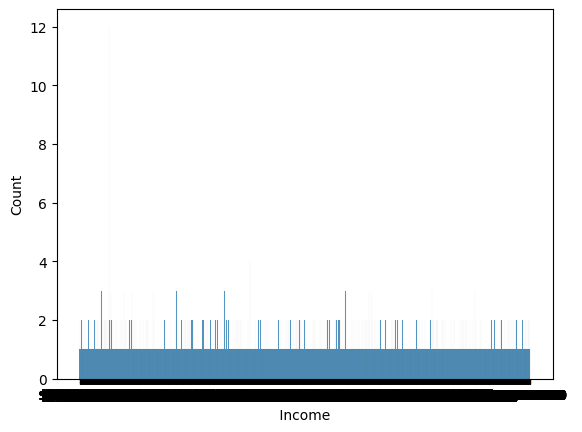

In [38]:
# not working 
sns.histplot(data[" Income "], bins = 10)

# Slicing the dataframe

## Primary function for slicing a dataframe: .loc
- parameters: [index_value or index_range or a list of indices , column_index or list of columns or single column]

In [43]:
# Getting 1 row, all columns

# .loc 
data.loc[0, :]

ID                            1826
Year_Birth                    1970
Education               Graduation
Marital_Status            Divorced
 Income                $84,835.00 
Kidhome                          0
Teenhome                         0
Dt_Customer                6/16/14
Recency                          0
MntWines                       189
MntFruits                      104
MntMeatProducts                379
MntFishProducts                111
MntSweetProducts               189
MntGoldProds                   218
NumDealsPurchases                1
NumWebPurchases                  4
NumCatalogPurchases              4
NumStorePurchases                6
NumWebVisitsMonth                1
AcceptedCmp3                     0
AcceptedCmp4                     0
AcceptedCmp5                     0
AcceptedCmp1                     0
AcceptedCmp2                     0
Response                         1
Complain                         0
Country                         SP
Name: 0, dtype: obje

In [44]:
# first 5 rows, all columns
data.loc[0:5 , :]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP


In [45]:
# first 5 rows, just income
data.loc[0:5 , " Income "]

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
5    $71,691.00 
Name:  Income , dtype: object

In [46]:
# first 5 rows, income + Kidhome
data.loc[0:5 , [" Income ", "Kidhome"]]

,Income,Kidhome
0,"$84,835.00",0
1,"$57,091.00",0
2,"$67,267.00",0
3,"$32,474.00",1
4,"$21,474.00",1
5,"$71,691.00",0


In [48]:
# all the rows but just income + kidhome as columns
data[[" Income ", "Kidhome"]]

,Income,Kidhome
0,"$84,835.00",0
1,"$57,091.00",0
2,"$67,267.00",0
3,"$32,474.00",1
4,"$21,474.00",1
...,...,...
2235,"$66,476.00",0
2236,"$31,056.00",1
2237,"$46,310.00",1
2238,"$65,819.00",0


In [49]:
# single colon means ALL 
data[[" Income ", "Kidhome"]]

InvalidIndexError: (slice(None, None, None), [' Income ', 'Kidhome'])

In [50]:
data.loc[:, [" Income ", "Kidhome"]]

,Income,Kidhome
0,"$84,835.00",0
1,"$57,091.00",0
2,"$67,267.00",0
3,"$32,474.00",1
4,"$21,474.00",1
...,...,...
2235,"$66,476.00",0
2236,"$31,056.00",1
2237,"$46,310.00",1
2238,"$65,819.00",0


In [52]:
import random

# sample only accepts lists, so need to convert the data.index (pandas.Series) to list
random_indices = random.sample(data.index.tolist(), 20)
print(random_indices)

[2172, 0, 398, 517, 1784, 509, 1630, 254, 943, 1340, 1319, 1223, 1796, 1413, 69, 2230, 1645, 1275, 26, 2013]


In [53]:
data.loc[random_indices, [" Income ", "Kidhome"]]

,Income,Kidhome
2172,"$15,072.00",2
0,"$84,835.00",0
398,"$36,230.00",1
517,"$98,777.00",0
1784,"$25,176.00",1
509,"$31,497.00",0
1630,"$28,510.00",1
254,"$35,178.00",1
943,"$39,684.00",1
1340,"$82,017.00",0


In [54]:
# does sorted give us a list?
type(sorted(data.index))

list

# Using conditions while slicing and dicing

still using the loc function
df.loc[ (conditional statement) & | (conditional statement)]

conditional_statement = df[column] > < == .isin() >= <=

not is with ~

In [56]:
# slicing on 1 condition
# all_rows where year of birth >= 1990
rich_people = data.loc[data["Year_Birth"] >= 1990]
rich_people[" ].describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,5715.672131,1991.721311,0.180328,0.0,45.262295,333.098361,38.688525,291.016393,53.196721,35.426230,...,3.606557,5.754098,4.901639,0.114754,0.065574,0.180328,0.114754,0.032787,0.229508,0.016393
std,3250.521731,1.713973,0.387651,0.0,27.469924,361.166338,50.524100,308.286798,61.705164,38.997632,...,3.421884,3.107280,3.128924,0.321370,0.249590,0.387651,0.321370,0.179556,0.424006,0.128037
min,193.000000,1990.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3005.000000,1990.000000,0.000000,0.0,19.000000,12.000000,4.000000,18.000000,8.000000,8.000000,...,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5067.000000,1991.000000,0.000000,0.0,46.000000,202.000000,17.000000,132.000000,24.000000,25.000000,...,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8541.000000,1992.000000,0.000000,0.0,66.000000,536.000000,47.000000,523.000000,86.000000,51.000000,...,6.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11101.000000,1996.000000,1.000000,0.0,98.000000,1332.000000,185.000000,951.000000,250.000000,169.000000,...,11.000000,12.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [63]:
# slicing and dicing on categorical value belonging to a list
## I want all the single and married people 

status_wanted = ["Single", "Married"]
# using .isin(some_list) to get only rows that are in in list
single_married = data.loc[data["Marital_Status"].isin(status_wanted)]
single_married.shape

(1344, 28)

In [65]:
# two conditions with and 
## You can have as many conditionals as you want
single_married_young = data.loc[
    (data["Year_Birth"] >= 1990) & 
    (data["Marital_Status"].isin(status_wanted))
]

In [66]:
single_married_young.shape

(51, 28)

In [74]:
# showing not with ~
not_single_married = data.loc[~ data["Marital_Status"].isin(status_wanted)]

In [72]:
# showing an or conditional
single_married_or_young = data.loc[
    (data["Year_Birth"] >= 1990) | 
    (data["Marital_Status"].isin(status_wanted))
]

In [73]:
single_married_or_young.shape

(1354, 28)